# Exploring the Data

<hr style="border:2px solid red"> </hr>

Time to see what this data looks like under the hood!

In [1]:
# Data Science Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Block Warning Boxes
import warnings
warnings.filterwarnings("ignore")

import wrangle

#### Instructor Suggestions:
break up december  
is there a seasonality? night and day? trend?  
choose just one for modeling  
predict model for next day temp  

In [2]:
df = wrangle.prepare_TWINS()
df.head()

,twins_2L_TEMP,twins_air_TEMP
earth_date,,
2018-11-30 23:37:00,-4658.8,-5703.0
2018-11-30 23:37:01,-4741.4,-5776.0
2018-11-30 23:37:02,-4746.4,-5803.0
2018-11-30 23:37:03,-4740.4,-5771.0
2018-11-30 23:37:04,-4748.4,-5754.0


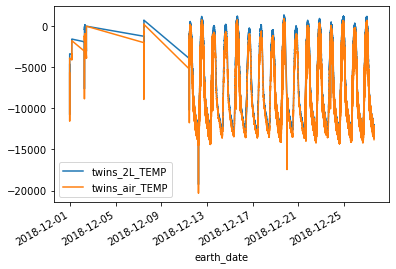

In [3]:
# Let's take the first look at my data
df.plot();

In [4]:
# So a lot of time series functions seem to break with nulls
# therefore I'm gonna drop them ad see what happens
no_nulls_df = df.dropna()
no_nulls_df.isnull().sum()

twins_2L_TEMP     0
twins_air_TEMP    0
dtype: int64

In [5]:
df.index.min(), df.index.max()

(Timestamp('2018-11-30 23:37:00'), Timestamp('2019-03-30 03:22:25'))

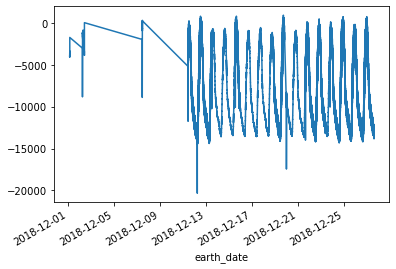

In [6]:
# Most of my data is in that first december, so I'm going to zoom in on that
# I'm also going to focus on Air_temp for my MVP.
december = no_nulls_df['12-2018'].twins_air_TEMP
no_nulls_df['12-2018'].twins_air_TEMP.plot();

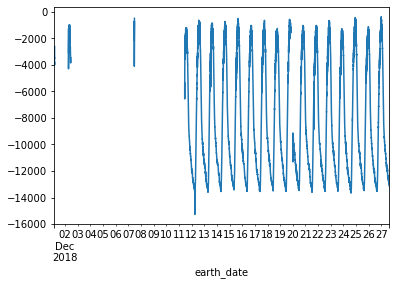

In [7]:
# Resample data to minute view
december.resample('60S').mean().plot();

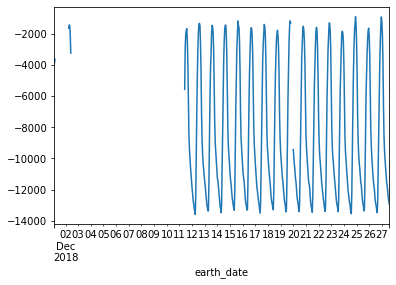

In [8]:
# Resample data to hourly view
december.resample('H').mean().plot();

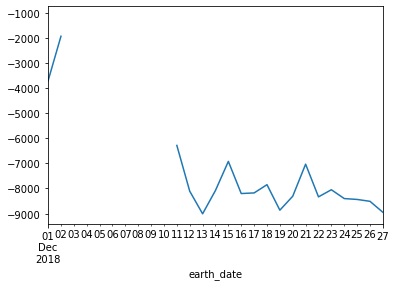

In [9]:
# Resample data to daily view
december.resample('D').mean().plot();

In [10]:
# Slicing out the days I need for my data to be continuous
six_day = train['2018-12-12' : '2018-12-18']
six_day.resample('H').mean().isnull().sum()

NameError: name 'train' is not defined

In [11]:
# Train / Test split
# Train will hold the first 90% of the data and test will hold 10% 
train_size = int(len(df['2018-12-12' : '2018-12-18']) * .9)

# Now to actually split into train / test
train = december[: train_size]
test = december[train_size : ]

In [12]:
# # Train / Test split
# # Train will hold the first 80% of the data and test will hold 20% 
# train_size = int(len(december) * .8)

# # Now to actually split into train / test
# train = december[: train_size]
# test = december[train_size : ]

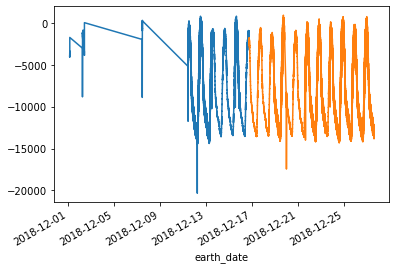

In [13]:
# Visualize the split data:
train.plot()
test.plot();

In [14]:

# train.resample('60S').mean().plot(label='Resampled Minute', alpha=.6)
# train.rolling('60S').mean().plot(label='Rolling Minute Average', alpha=.6)
# plt.legend();

# train.rolling()


Text(0, 0.5, 'Difference in Temperature')

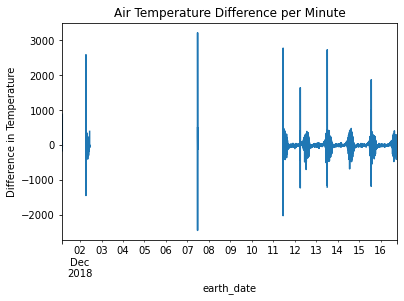

In [15]:
# Plot the minute difference. 
train.resample('60S').mean().diff().plot()
plt.title('Air Temperature Difference per Minute');
plt.ylabel('Difference in Temperature')

Text(0, 0.5, 'Difference in Temperature')

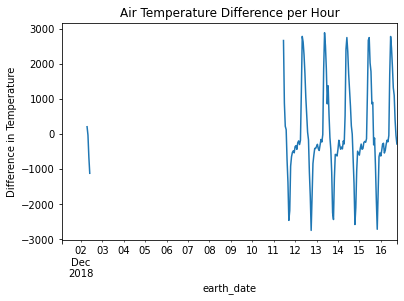

In [16]:
# Plot the hour difference. 
train.resample('H').mean().diff().plot()
plt.title('Air Temperature Difference per Hour');
plt.ylabel('Difference in Temperature')

Text(0, 0.5, 'Difference in Temperature')

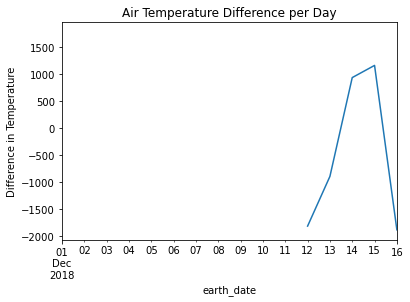

In [17]:
# Plot the daily difference. 
train.resample('D').mean().diff().plot()
plt.title('Air Temperature Difference per Day');
plt.ylabel('Difference in Temperature')

Text(0, 0.5, 'Percent Change')

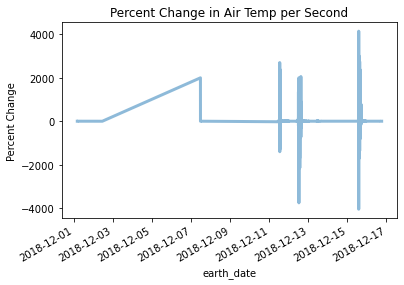

In [18]:
# Maybe it would be helpful to look at percent change as well:
(train.diff() / train.shift()).plot(alpha=.5, lw=3)
plt.title('Percent Change in Air Temp per Second')
plt.ylabel('Percent Change')

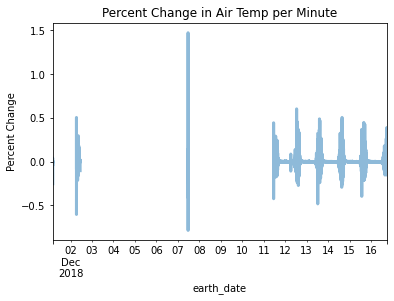

In [19]:
# Maybe it would be helpful to look at percent change as well:
(train.resample('60S').mean().diff() / train.resample('60S').mean().shift()).plot(alpha=.5, lw=3)
plt.title('Percent Change in Air Temp per Minute')
plt.ylabel('Percent Change');

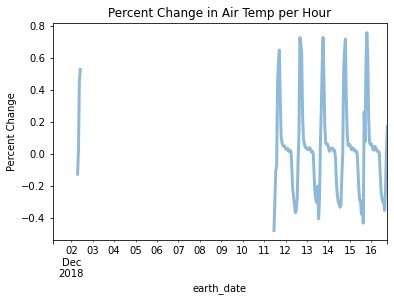

In [20]:
# Maybe it would be helpful to look at percent change as well:
(train.resample('H').mean().diff() / train.resample('H').mean().shift()).plot(alpha=.5, lw=3)
plt.title('Percent Change in Air Temp per Hour')
plt.ylabel('Percent Change');

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

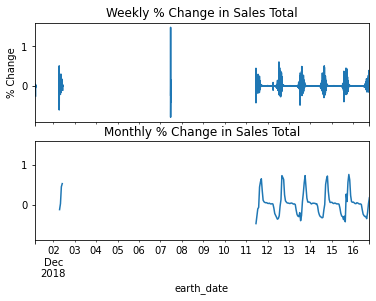

In [21]:
# Let's take a look at this minute over minute and hour over hour as well.

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

minutely = train.resample('60S').mean()
(minutely.diff() / minutely.shift()).plot(ax= ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

hourly = train.resample('H').mean()
(hourly.diff() / hourly.shift()).plot(ax= ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

In [22]:
# # Autocorrelation w/seconds takes too much processing time:
# pd.plotting.autocorrelation_plot(train);


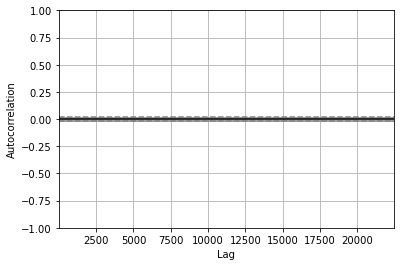

In [23]:
# Autocorrelation after minute resampling:
pd.plotting.autocorrelation_plot(train.resample('60S').mean());


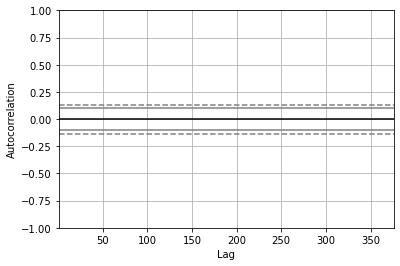

In [24]:
# Autocorrelation after minute resampling:
pd.plotting.autocorrelation_plot(train.resample('H').mean());


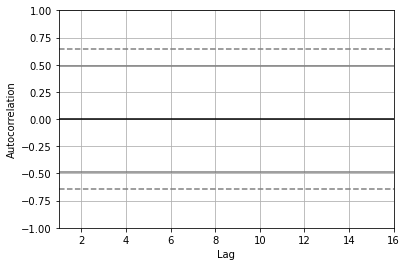

In [25]:
# Autocorrelation after minute resampling:
pd.plotting.autocorrelation_plot(train.resample('D').mean());


In [26]:
# Decompose the data
sm.tsa.seasonal_decompose(train.resample('60S').mean()).plot()
None

ValueError: This function does not handle missing values

In [27]:
# Decompose the data
sm.tsa.seasonal_decompose(y.resample('H').mean()).plot()
None

NameError: name 'y' is not defined

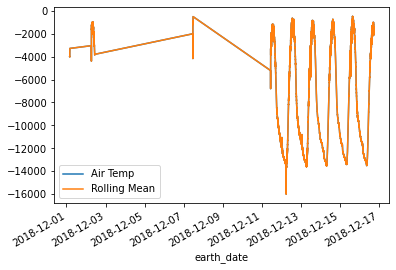

In [28]:
# Minutes vs rolling minutes
train.rolling('60S').mean().plot(label="Air Temp")
plt.plot(train.rolling('60S').mean(), label="Rolling Mean")
plt.legend();


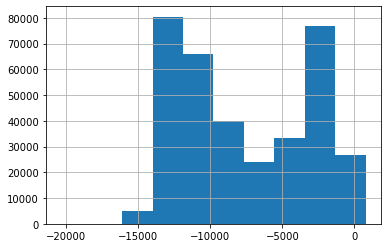

In [29]:
# What is the distribution of my data?
train.hist();

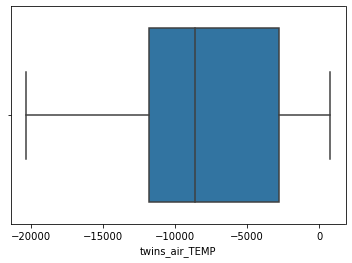

In [30]:
sns.boxplot(train);

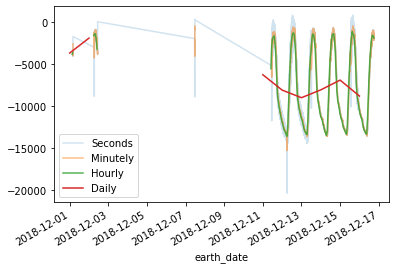

In [31]:
# Visualizations to see how the aggregating smoothes out the data.
train.plot(alpha=.2, label='Seconds')
train.resample('60S').mean().plot(alpha=.5, label='Minutely')
train.resample('H').mean().plot(alpha=.8, label='Hourly')
train.resample('D').mean().plot(label='Daily')
plt.legend();


### Seasonal Plot 
A seasonal plot is one that shows the comparison of multiple years together. It is another line plot with the x-axis being the month of the year and the y axis being the target variable. Multiple lines are shown to show multiple years.

In my case, I am going to see if there is a "seasonality" for each day.

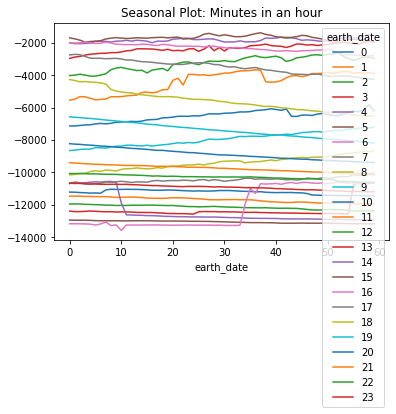

In [32]:
# Seasonality of minutes in a year
train.groupby([train.index.hour, train.index.minute]).mean().unstack(0).plot(title='Seasonal Plot: Minutes in an hour');



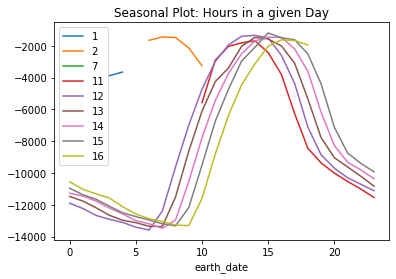

In [33]:
# Seasonality of hours in a day
train.groupby([train.index.day, train.index.hour]).mean().unstack(0).plot(title='Seasonal Plot: Hours in a given Day');
plt.legend();


>Takeaway: There is a very clear "seasonality" to air temperature throughout the day. My hypothesis (although probably a no brainer) it that it's much colder at night than the day.

### Lag Plot
A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

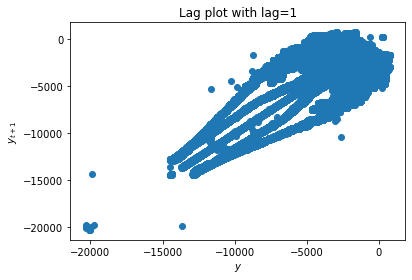

In [34]:
# Such a beautiful octopus
plt.scatter(train, train.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');


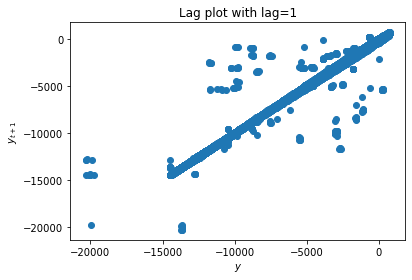

In [35]:
# Such a beautiful octopus
plt.scatter(train, train.shift(-10))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');


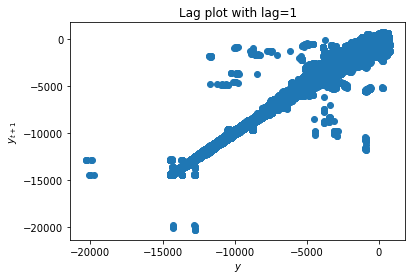

In [36]:
# Such a beautiful octopus
plt.scatter(train, train.shift(-200))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');


### Autocorrelation Plot
Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.  
The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

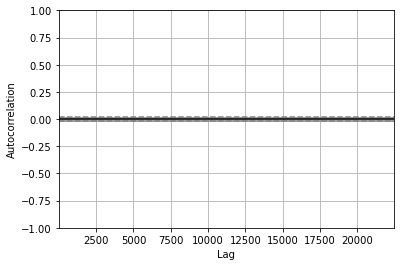

In [37]:
# Minutes
pd.plotting.autocorrelation_plot(train.resample('60S').mean());


In [38]:
train.head()

earth_date
2018-12-01 03:55:06   -4008.0
2018-12-01 03:55:07   -3993.0
2018-12-01 03:55:08   -4012.5
2018-12-01 03:55:09   -4006.5
2018-12-01 03:55:10   -4004.0
Name: twins_air_TEMP, dtype: float64

In [39]:
train.resample('H').mean()

earth_date
2018-12-01 03:00:00   -3870.965232
2018-12-01 04:00:00   -3641.871248
2018-12-01 05:00:00            NaN
2018-12-01 06:00:00            NaN
2018-12-01 07:00:00            NaN
                          ...     
2018-12-16 14:00:00   -3124.662162
2018-12-16 15:00:00   -2018.751351
2018-12-16 16:00:00   -1617.099459
2018-12-16 17:00:00   -1654.860541
2018-12-16 18:00:00   -1939.548000
Freq: H, Name: twins_air_TEMP, Length: 376, dtype: float64

In [40]:
train['2018-12-01']

earth_date
2018-12-01 03:55:06   -4008.0
2018-12-01 03:55:07   -3993.0
2018-12-01 03:55:08   -4012.5
2018-12-01 03:55:09   -4006.5
2018-12-01 03:55:10   -4004.0
                        ...  
2018-12-01 04:10:11   -1804.0
2018-12-01 04:10:12   -1778.0
2018-12-01 04:10:13   -1791.0
2018-12-01 04:10:14   -1802.0
2018-12-01 04:10:15   -1763.0
Name: twins_air_TEMP, Length: 935, dtype: float64

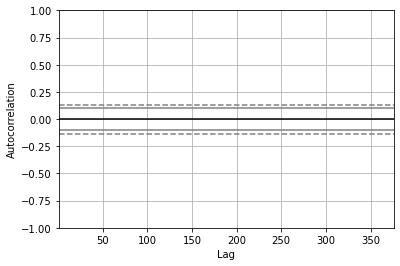

In [41]:
# Hours
pd.plotting.autocorrelation_plot(train.resample('H').mean());


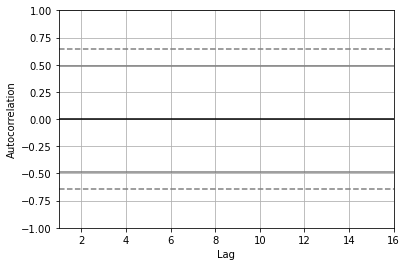

In [42]:
# Days
pd.plotting.autocorrelation_plot(train.resample('D').mean());


### Seasonal decomposition
Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise.

In [43]:
train.isnull().sum()

0

In [44]:
y = train.resample('60S').mean()
y.isnull().sum()

14734

In [45]:
# Cant' seem to get decomp to work?
y = train.resample('60S').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


ValueError: This function does not handle missing values

<hr style="border:2px solid red"> </hr>

- remove time gaps!
- need continuous data
- don't need seasonality to make predictions
- day by day graphs, see which are problematic
- if missing in middle maybe substitute

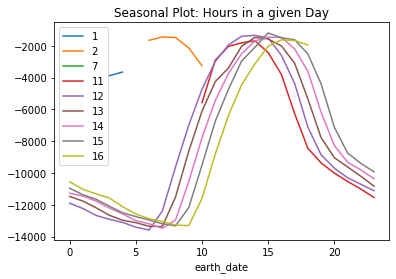

In [46]:
# Seasonality of hours in a day
train.groupby([train.index.day, train.index.hour]).mean().unstack(0).plot(title='Seasonal Plot: Hours in a given Day');
plt.legend();


In [47]:
# Let's see where I'm missing data
# Looks like if I want full days worth of data, i need to use Dec 12-18 only. Then my data will be continuous
train.groupby([train.index.day, train.index.hour]).mean().unstack(0)

earth_date,1,2,7,11,12,13,14,15,16
earth_date,,,,,,,,,
0,NaN,NaN,NaN,NaN,-11901.341541,-11473.486121,-11269.489189,-10957.576486,-10553.503784
1,NaN,NaN,NaN,NaN,-12232.411892,-11766.740973,-11446.559113,-11365.630270,-11024.521892
2,NaN,NaN,NaN,NaN,-12668.915676,-12188.354054,-11768.706235,-11651.647854,-11312.373039
3,-3870.965232,NaN,NaN,NaN,-12913.991892,-12657.648919,-12202.252162,-12087.595946,-11575.504178
4,-3641.871248,NaN,NaN,NaN,-13109.709459,-12970.849189,-12574.138108,-12500.257838,-12117.395405
5,NaN,NaN,NaN,NaN,-13408.963243,-13125.780811,-12998.174865,-12744.043514,-12582.631892
6,NaN,-1643.186904,NaN,NaN,-13587.250501,-13352.247297,-13194.736885,-12955.113784,-12874.688378
7,NaN,-1434.907027,NaN,NaN,-12397.206757,-13366.556486,-13477.322162,-13191.215405,-13051.011081
8,NaN,-1466.608108,NaN,NaN,-9612.626216,-11510.218108,-12954.677838,-13327.069189,-13272.431622


In [48]:
train.head()

earth_date
2018-12-01 03:55:06   -4008.0
2018-12-01 03:55:07   -3993.0
2018-12-01 03:55:08   -4012.5
2018-12-01 03:55:09   -4006.5
2018-12-01 03:55:10   -4004.0
Name: twins_air_TEMP, dtype: float64

In [49]:
# Slicing out the days I want for continuous data
six_day = train['2018-12-12' : '2018-12-18']
six_day.resample('H').mean().isnull().sum()

0